In [63]:
from Bio.PDB import PDBParser
import numpy as np

# Path to your PDB file
pdb_file = "/home/nayanika/Downloads/2f8a.pdb"
#pdb_file = "/home/nayanika/Downloads/7fc2.pdb"
#pdb_file = "/home/nayanika/OneDrive/Thesis/OpenMM/CESGA/GPX6/GPX6_H/prepare/GPX6.pdb"

# Create a PDB parser object
parser = PDBParser()

# Parse the PDB file
structure = parser.get_structure("protein", pdb_file)


/home/nayanika/Downloads/2f8a.pdb


/home/nayanika/miniconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3509.
  warnings.warn(
/home/nayanika/miniconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3516.
  warnings.warn(
/home/nayanika/miniconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3523.
  warnings.warn(
/home/nayanika/miniconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3721.
  warnings.warn(


In [59]:

# List of residue pairs you want to calculate distances for
residue_pairs = [(('A', 56), ('A', 49)),  
                 (('A', 63), ('A', 49)),  
                 (('A', 70), ('A', 49)),
                 (('A', 83), ('A', 49)),
                 (('A', 90), ('A', 49)),
                 (('A', 92), ('A', 49)),
                 (('A', 127), ('A', 49)),
                 (('A', 166), ('A', 49)),
                 (('A', 167), ('A', 49)),
                 # Add more pairs as needed
                 ]

# List to store the distances
distances = []


In [60]:
# Loop through each residue pair
for pair in residue_pairs:
    # Extract information about residue 1
    chain_id1, residue_number1 = pair[0]
    residue1 = structure[0][chain_id1][residue_number1]
    atom1 = residue1['CB']  # Beta carbon atom

    # Extract information about residue 2
    chain_id2, residue_number2 = pair[1]
    residue2 = structure[0][chain_id2][residue_number2]
    atom2 = residue2['CB']  # Beta carbon atom
    

    # Calculate the distance between the two atoms
    distance = atom1 - atom2

    # Append the distance to the list
    distances.append(distance)


In [61]:
# Create a distance matrix
distance_matrix = np.array(distances)

# Print the distance matrix
print(distance_matrix)



[ 9.186434  19.849134  20.8263    13.1522255 16.172844  20.145569
 19.1463    17.407911  20.871351 ]


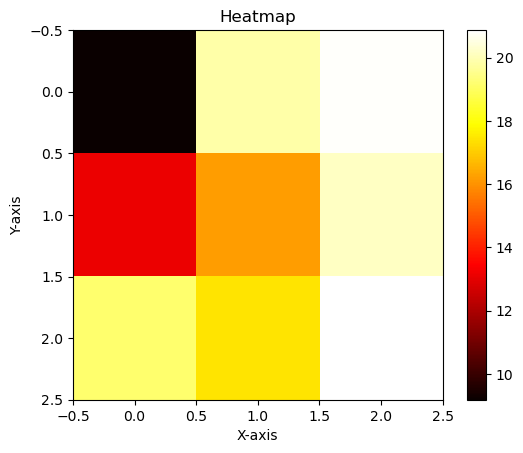

In [15]:
# Example matrix

import numpy as np
import matplotlib.pyplot as plt
matrix = np.array([[9.18,19.84,20.82],
                   [13.15, 16.17, 20.14],
                   [19.14, 17.40, 20.87]])

# Create the heatmap
plt.imshow(matrix, cmap='hot', interpolation='nearest')

# Add colorbar
plt.colorbar()

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Heatmap')

# Show the heatmap
plt.show()

In [ ]:
import numpy as np

def create_distance_array(lst):
    # Convert the list to a NumPy array
    arr = np.array(lst)
    
    # Calculate the pairwise differences between elements
    diff = arr[:, np.newaxis] - arr
    
    # Calculate the absolute distance
    distance_array = np.abs(diff)
    
    return distance_array

# Example usage
my_list = [1, 4, 7, 10]
distance_array = create_distance_array(my_list)
print(distance_array)

In [ ]:
from Bio.PDB import PDBParser

pdb_file = "/home/nayanika/Downloads/7fc2.pdb"

# Create a PDBParser object
parser = PDBParser()

# Parse the PDB file
structure = parser.get_structure("example", pdb_file)

# Iterate over the models in the structure
for model in structure:
    # Iterate over the chains in the model
    for chain in model:
        # Iterate over the residues in the chain
        for residue in chain:
            # Get the residue number
            residue_number = residue.get_id()[1]
            # Iterate over the atoms in the residue
            for atom in residue:
                # Print atom information
                print(f"Residue number: {residue_number}")
                print(f"Atom name: {atom.get_name()}")
                print(f"Atom coordinates: {atom.get_coord()}")
                print()

In [18]:
#The distance formula is given by:

#distance = sqrt((x2 - x1)^2 + (y2 - y1)^2 + (z2 - z1)^2)

import math

# Coordinates of Cβ atom for amino acid A
x_a, y_a, z_a = 11.581, 22.296, 35.526
# Coordinates of Cβ atom for amino acid B
x_b, y_b, z_b = 29.326, 20.483, 56.605

# Calculate the distance between Cβ atoms of amino acid A and B using the distance formula
distance = math.sqrt((x_b - x_a)**2 + (y_b - y_a)**2 + (z_b - z_a)**2)

print("Distance between amino acid A and B:", distance)


Distance between amino acid A and B: 27.613334369467225


In [ ]:
import numpy as np

# Example elements
elements = [(29.326, 20.483, 56.605), (11.911, 21.786, 43.414), (15.702, 27.208, 49.728), (9.775, 26.816, 40.716), (11.581, 22.296, 35.526),(21.427, 24.94, 28.717), (26.117, 19.134, 51.141),(28.943, 32.536, 41.89), (23.913, 34.421, 32.778), (25.84,  31.084, 26.584), (23.814, 28.184, 31.097), (11.757, 4.512, 49.03), (27.185, 1.423, 52.55), (29.663, 3.793, 57.114),(19.279 ,6.873, 50.768),(30.567,14.87,43.053),(37.398, 5.521, 35.398),(31.223,21.757,35.109)] 


# Number of elements
N = len(elements)

# Create an empty matrix to store the distances
dist_matrix = np.zeros((N, N))

# Define your distance formula
def distance_formula(element_i, element_j):
    # Replace this with your own distance formula
    return np.sqrt((element_j[0] - element_i[0])**2 + (element_j[1] - element_i[1])**2)

# Calculate the distances and populate the matrix
for i in range(N):
    for j in range(N):
        # Calculate the distance between elements i and j
        dist = distance_formula(elements[i], elements[j])
        # Store the distance in the matrix
        dist_matrix[i][j] = dist

print(dist_matrix)

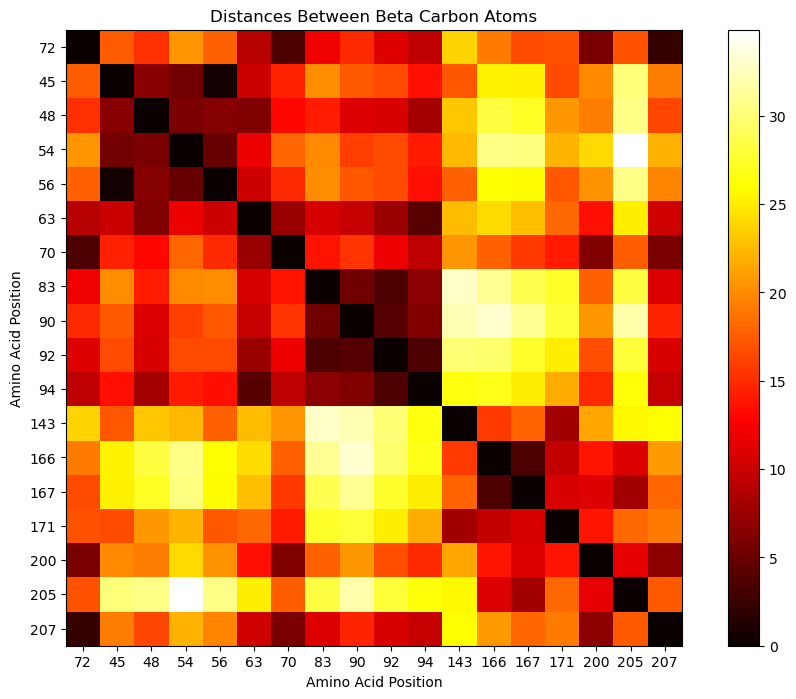

In [14]:
# Example matrix

import numpy as np
import matplotlib.pyplot as plt

matrix = np.array([[ 0, 17.46367756, 15.19338675, 20.55111895, 17.83737632,  9.0696775,
   3.48101738, 12.05908363, 14.95220429, 11.15945326,  9.47035084, 23.74326435,
  19.17987177, 16.69340196, 16.91668729,  5.74855199, 17.00054787,  2.28510065],
 [17.46367756,  0. ,         6.6158722 ,  5.46474116 , 0.6074537 , 10.02506718,
  14.45142  ,  20.14079254, 17.42673891, 16.74723395, 13.51354184, 17.27468645,
  25.45480004, 25.27610637, 16.63385082, 19.89666786, 30.23470513, 19.31202177],
 [15.19338675,  6.6158722,   0. ,         5.93994891,  6.41173806,  6.15787699,
  13.17807653, 14.27275954, 10.92922184, 10.85368232,  8.17050304, 23.03630702,
  28.22632661, 27.26117653, 20.64720693, 19.31824187, 30.67641415, 16.45037513],
 [20.55111895,  5.46474116,  5.93994891,  0.    ,      4.86744656, 11.80205406,
  18.05752165, 20.00326533, 16.05363102, 16.62227569, 14.10549343, 22.39189005,
  30.78818847, 30.42352828, 22.09183707, 23.97945329, 34.87846261, 22.03656473],
 [17.83737632,  0.6074537,   6.41173806,  4.86744656,  0.   ,      10.19482477,
  14.87593829, 20.15680143, 17.29432997, 16.7495679 , 13.5762599 , 17.78487087,
  26.06083163, 25.87121437, 17.23740505 ,20.38660521, 30.78827884 ,19.64939401],
 [ 9.0696775 , 10.02506718,  6.15787699, 11.80205406, 10.19482477 , 0.,
   7.46362754 ,10.68594741,  9.80150789 , 7.56460871,  4.02756812 ,22.60115227,
  24.21164705, 22.69421303, 18.19424065, 13.59943014, 25.14299907 ,10.30015073],
 [ 3.48101738 ,14.45142  ,  13.17807653, 18.05752165 ,14.87593829 , 7.46362754,
   0.   ,      13.69671055, 15.44506345, 11.95320999 , 9.33843183 ,20.49420611,
  17.74317179, 15.74548815, 14.0388876,   6.163132 ,  17.67978309 , 5.74032795],
 [12.05908363 ,20.14079254, 14.27275954, 20.00326533 ,20.15680143 ,10.68594741,
  13.69671055,  0. ,         5.37160358 , 3.42591783,  6.72655521 ,32.87405013,
  31.16262718, 28.75201643 ,27.42229868 ,17.74048849, 28.30719432 ,11.01749704],
 [14.95220429, 17.42673891, 10.92922184 ,16.05363102, 17.29432997 , 9.80150789,
  15.44506345 , 5.37160358 , 0.  ,        3.85342679,  6.23778566 ,32.28492864,
  33.15982491, 31.16306923, 27.93503642, 20.65229568, 31.89130328, 14.62234578],
 [11.15945326, 16.74723395 ,10.85368232, 16.62227569, 16.7495679 ,  7.56460871,
  11.95320999 , 3.42591783,  3.85342679,  0.       ,   3.5376088  ,30.07327839,
  29.69147935, 27.55746741, 25.0842429,  16.88900012, 28.05448864, 10.76891907],
 [ 9.47035084, 13.51354184,  8.17050304, 14.10549343, 13.5762599 ,  4.02756812,
   9.33843183,  6.72655521 , 6.23778566,  3.5376088 ,  0.   ,      26.5656702,
  26.97248157, 25.08249752, 21.78818363, 14.92868397, 26.42227517 , 9.80813999],
 [23.74326435, 17.27468645, 23.03630702, 22.39189005, 17.78487087 , 22.60115227,
  20.49420611, 32.87405013 ,32.28492864, 30.07327839, 26.5656702 ,  0.,
  15.73420176, 17.9204296,   7.88383187, 21.47333845, 25.66084492 ,26.00606047],
 [19.17987177, 25.45480004, 28.22632661, 30.78818847, 26.06083163 ,24.21164705,
  17.74317179, 31.16262718 ,33.15982491, 29.69147935, 26.97248157 ,15.73420176,
   0.     ,     3.4289042 ,  9.6024651 , 13.8657756,  11.00449785 ,20.73106365],
 [16.69340196, 25.27610637, 27.26117653, 30.42352828, 25.87121437, 22.69421303,
  15.74548815, 28.75201643 ,31.16306923, 27.55746741 ,25.08249752 ,17.9204296,
   3.4289042,   0.     ,    10.83115211, 11.11382675,  7.92566773, 18.03160825],
 [16.91668729 ,16.63385082 ,20.64720693, 22.09183707, 17.23740505, 18.19424065,
  14.0388876 , 27.42229868, 27.93503642, 25.0842429 , 21.78818363 , 7.88383187,
   9.6024651 , 10.83115211,  0.    ,     13.83368906, 18.16937162, 19.08383064],
 [ 5.74855199, 19.89666786, 19.31824187 ,23.97945329, 20.38660521 ,13.59943014,
   6.163132 ,  17.74048849, 20.65229568 ,16.88900012 ,14.92868397 ,21.47333845,
  13.8657756 , 11.11382675, 13.83368906,  0.    ,     11.57870295 , 6.91817209],
 [17.00054787 ,30.23470513, 30.67641415 ,34.87846261, 30.78827884 ,25.14299907,
  17.67978309 ,28.30719432, 31.89130328 ,28.05448864, 26.42227517, 25.66084492,
  11.00449785,  7.92566773, 18.16937162, 11.57870295,  0.     ,    17.3706166 ],
 [ 2.28510065 ,19.31202177, 16.45037513 ,22.03656473, 19.64939401, 10.30015073,
   5.74032795, 11.01749704, 14.62234578, 10.76891907 , 9.80813999 ,26.00606047,
  20.73106365, 18.03160825, 19.08383064,  6.91817209, 17.3706166,   0.        ]])
# Create the heatmap
plt.imshow(matrix, cmap='hot', interpolation='nearest')

# Add colorbar
plt.colorbar()
x_labels = ['72', '45', '48', '54', '56', '63', '70', '83', '90', '92', '94', '143', '166', '167', '171', '200', '205', '207']
y_labels = ['72', '45', '48', '54', '56', '63', '70', '83', '90', '92', '94', '143', '166', '167', '171', '200', '205', '207']
plt.xticks(range(len(x_labels)), x_labels)
plt.yticks(range(len(y_labels)), y_labels)
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.xlabel('Amino Acid Position')
plt.ylabel('Amino Acid Position')
plt.title('Distances Between Beta Carbon Atoms')

# Show the heatmap
plt.show()

In [5]:
import numpy as np

# Example elements
elements = [(29.326, 20.483, 56.605), (21.427, 24.94, 28.717), (26.117, 19.134,51.141), (23.814, 28.184, 31.097), (30.567, 14.87, 43.053), (31.223, 21.757, 35.109) ] 


# Number of elements
N = len(elements)

# Create an empty matrix to store the distances
dist_matrix = np.zeros((N, N))

# Define your distance formula
def distance_formula(element_i, element_j):
    # Replace this with your own distance formula
    return np.sqrt((element_j[0] - element_i[0])**2 + (element_j[1] - element_i[1])**2)

# Calculate the distances and populate the matrix
for i in range(N):
    for j in range(N):
        # Calculate the distance between elements i and j
        dist = distance_formula(elements[i], elements[j])
        # Store the distance in the matrix
        dist_matrix[i][j] = dist

print(dist_matrix)

[[ 0.          9.0696775   3.48101738  9.47035084  5.74855199  2.28510065]
 [ 9.0696775   0.          7.46362754  4.02756812 13.59943014 10.30015073]
 [ 3.48101738  7.46362754  0.          9.33843183  6.163132    5.74032795]
 [ 9.47035084  4.02756812  9.33843183  0.         14.92868397  9.80813999]
 [ 5.74855199 13.59943014  6.163132   14.92868397  0.          6.91817209]
 [ 2.28510065 10.30015073  5.74032795  9.80813999  6.91817209  0.        ]]


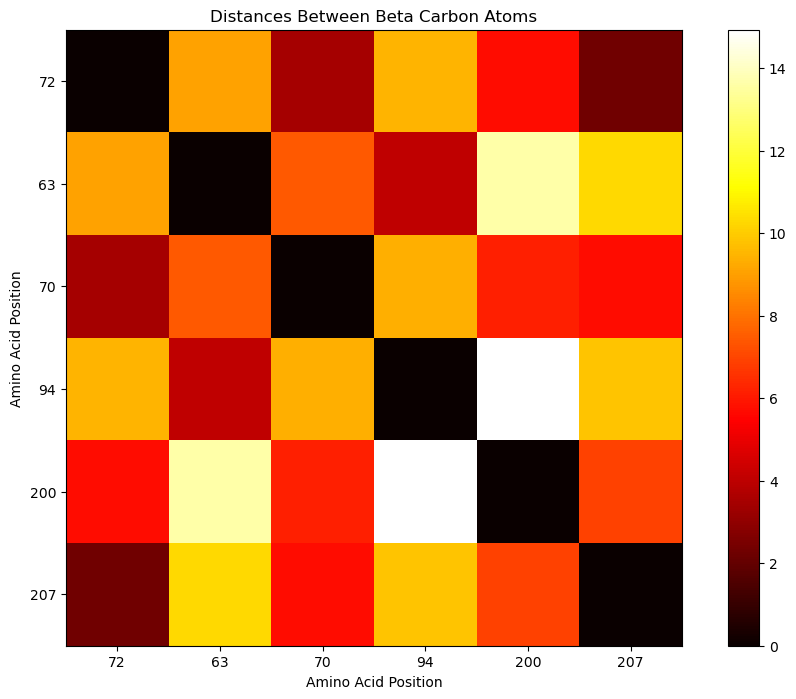

In [ ]:
# Example matrix

import numpy as np
import matplotlib.pyplot as plt
matrix = np.array([[ 0.    ,      9.0696775 ,  3.48101738, 9.47035084 , 5.74855199 , 2.28510065],
 [ 9.0696775 ,  0.   ,       7.46362754 , 4.02756812 , 13.59943014 ,10.30015073],
 [ 3.48101738,  7.46362754,  0.     ,     9.33843183 , 6.163132  ,  5.74032795],
 [ 9.47035084 , 4.02756812 , 9.33843183 , 0.  ,      14.92868397, 9.80813999],
 [ 5.74855199 ,13.59943014 , 6.163132 ,  14.92868397 , 0.      ,    6.91817209],
 [ 2.28510065, 10.30015073 , 5.74032795 , 9.80813999 , 6.91817209 , 0.     ]])
# Create the heatmap
plt.imshow(matrix, cmap='hot', interpolation='nearest')

# Add colorbar
plt.colorbar()
x_labels = ['72', '63', '70',  '94', '200', '207']
y_labels = ['72', '63', '70',  '94', '200', '207']
plt.xticks(range(len(x_labels)), x_labels)
plt.yticks(range(len(y_labels)), y_labels)
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.xlabel('Amino Acid Position')
plt.ylabel('Amino Acid Position')
plt.title('Distances Between Beta Carbon Atoms')

# Show the heatmap
plt.show()